![Memories Teach](https://lh3.google.com/u/2/d/11o4JyBYhHcmz-LSt63GpOs4lfW9j39T_=w1912-h954-iv1)


`Basic to Advance in Google colab's for image processing, pattern recognition and computer vision`

[Phonepaserth SISAYKEO]

Reference: visioncolab

# Transformaciones proyectivas 2D

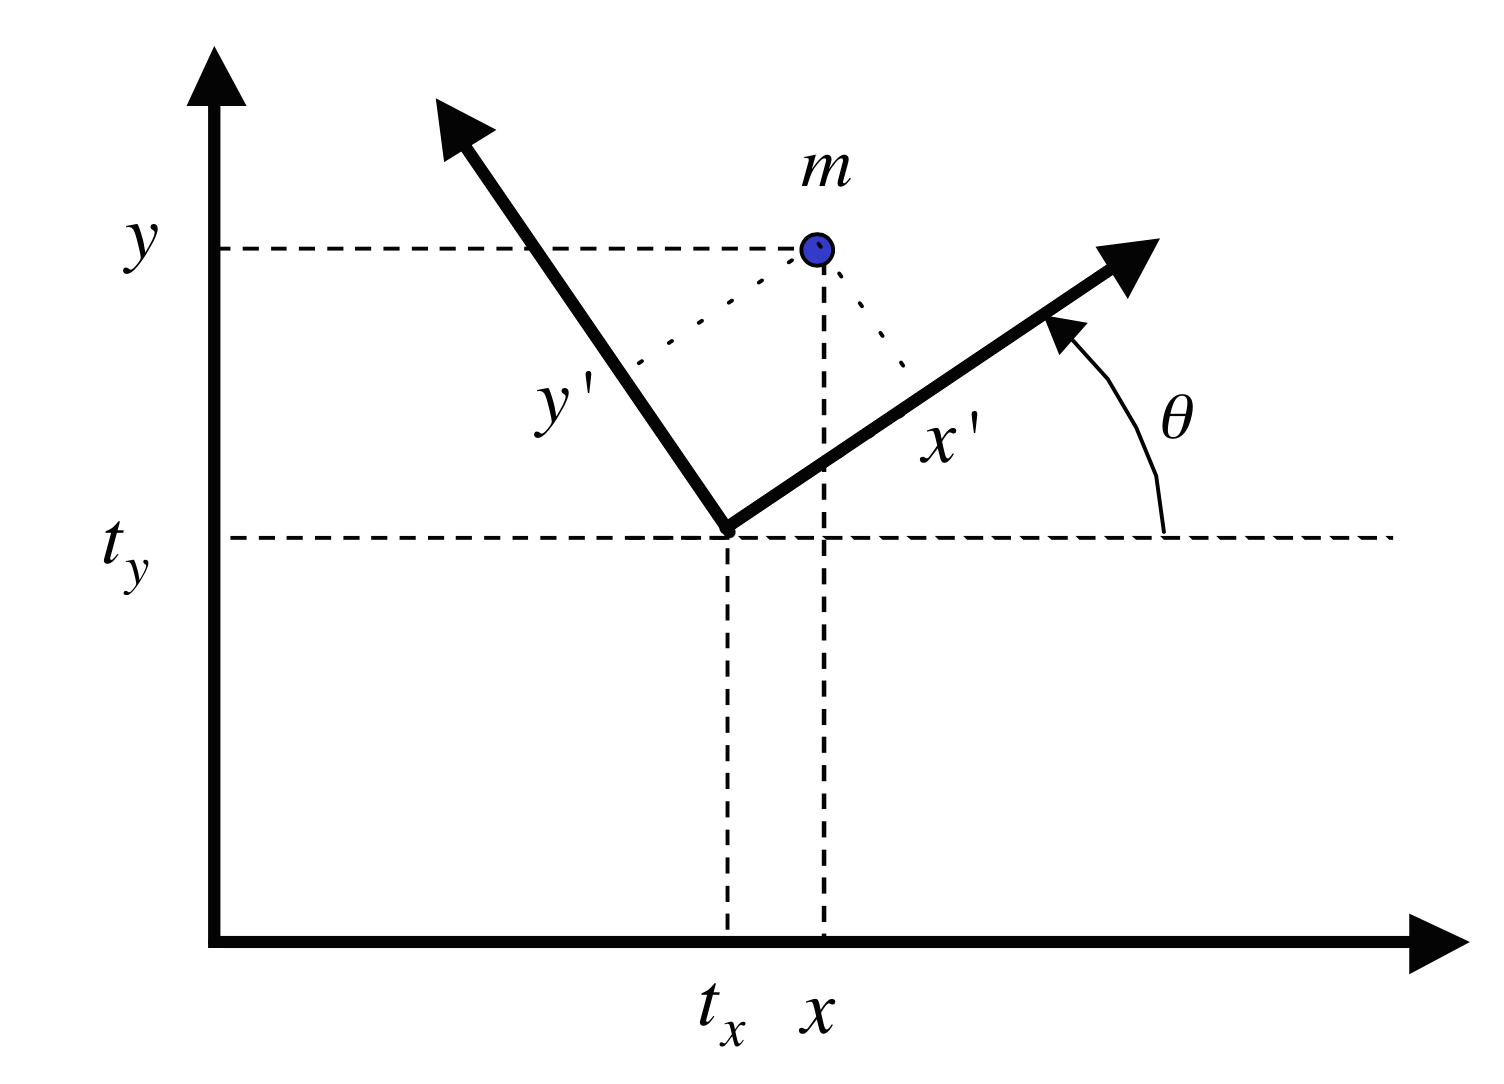

En este ejemplo, $t_x= 4,1$cm, $t_y=3,2$cm y $\theta = 35^o$. Las coordenadas de $m$ son $x=4,9$cm y $y=5,5$cm. Si queremos encontrar las coordenadas de este punto en el sistema de coordenadas $(x',y')$, podemos utilizar el siguiente código de Python, donde ${\bf m} = [x \ y \ 1]^{\sf T}$ y ${\bf m}' = [x' \ y' \ 1]^{\sf T}$ en coordenadas homogéneas se definen en las variables de Python `m` y `mp` respectivamente. En este ejemplo:

${\bf m} = {\bf H}{\bf m}'$

donde

${\bf H} = \left[
\begin{array}{c c c}
+\cos(\theta) & -\sin(\theta) & t_x \\
+\sin(\theta) & +\cos(\theta) & t_y \\
0 & 0 & 1
\end{array}
\right]
$

es decir:

${\bf m}' = {\bf H}^{-1}{\bf m}$

In [ ]:
import numpy as np

In [ ]:
def rotation_matrix_2d(theta):
  R = np.array([[np.cos(theta), -np.sin(theta)],
                [np.sin(theta),  np.cos(theta)]])
  return R


In [ ]:
theta = 35.0 / 180.0 * np.pi               # Rotación en radianes
t     = np.array([4.1, 3.2]).reshape(2,1)  # Traslación tx,ty
R     = rotation_matrix_2d(theta)

# Transformación Euclidea (Matriz H)
Rt = np.hstack([R, t])
H  = np.vstack([Rt, np.array([0, 0, 1])])

print('H = ',H)

x = 4.9
y = 5.5

# (x,y) en homogeneas
m  = np.array([x, y, 1])

# Transformacion m -> m'   (m -> mp)
mp = np.dot(np.linalg.inv(H), m)
mp = mp / mp[2]  # división por el último término

xp = mp[0]  # x'
yp = mp[1]  # y'

print('xp = {:1.4f}  | yp = {:1.4f} '.format(xp, yp))


H =  [[ 0.81915204 -0.57357644  4.1       ]
 [ 0.57357644  0.81915204  3.2       ]
 [ 0.          0.          1.        ]]
xp = 1.9745  | yp = 1.4252 


# Geometric transformation on images (homography)

In [ ]:
!wget https://www.dropbox.com/s/u45xorrschm71sn/painting.png

--2022-08-22 15:25:43--  https://www.dropbox.com/s/u45xorrschm71sn/painting.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/u45xorrschm71sn/painting.png [following]
--2022-08-22 15:25:43--  https://www.dropbox.com/s/raw/u45xorrschm71sn/painting.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0f2ded967473d31c104511a3a0.dl.dropboxusercontent.com/cd/0/inline/Brg7TWiC3tf-ptWpB8UCM9ZZD0RJ0x6PU8YWY8fxPvdz2puLnc2lv1cyUFnkBINoqzaGUUp2PeMC5UEJERM4iK4YFUqz31kztSFagP3kvAl3cVnhx6m9JpSDNtGDNry8Xi4SHsr_O0CpJpIIlKtuZSUVKmBRh4D-gw1Olt8d5exjDQ/file# [following]
--2022-08-22 15:25:44--  https://uc0f2ded967473d31c104511a3a0.dl.dropboxusercontent.com/cd/0/inline/Brg7TWiC3tf-ptWpB8UCM9ZZD0RJ0x6PU8YWY8fxPvdz2puLnc2lv1cyUFnkBINoqzaG

size =  (640, 479)


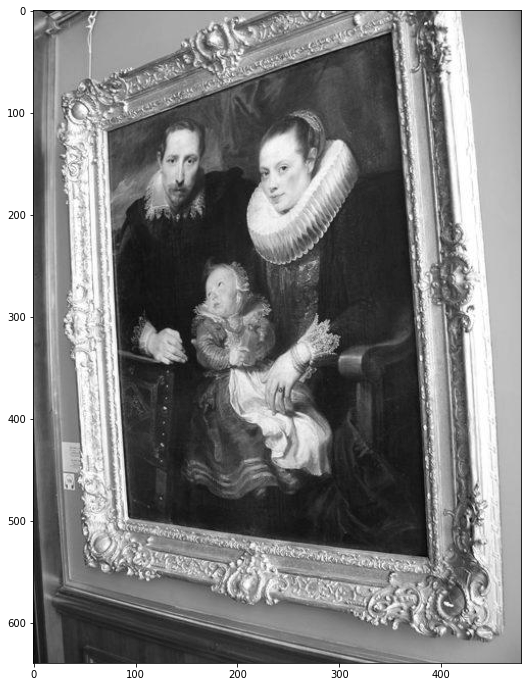

In [ ]:
import cv2
import matplotlib.pyplot as plt
X = cv2.imread('painting.png',0)
print('size = ',X.shape)
plt.figure(figsize=(18,12))
plt.imshow(X,cmap='gray')
plt.show()

In [ ]:
def homography(X,H):
  Hinv  = np.linalg.inv(H)
  Xp    = np.zeros((N,M),np.uint8)

  m = np.ones((N*M,3))
  t = 0
  for i in range(N):
    for j in range(M):
      m[t,0:2] = [j,i]
      t = t+1

  mph = np.dot(Hinv,m.T)  # Transformation m to mp
  mp  = np.divide(mph[0:2,:],mph[2,:])
  mpf = np.fix(mp).astype(int)

  ip = mpf[1,:]
  jp = mpf[0,:]
  ktj = np.logical_and(jp>=0,jp<M)
  kti = np.logical_and(ip>=0,ip<N)
  kt  = np.logical_and(kti,ktj)

  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        Xp[i,j] = X[ip[t],jp[t]]
      t = t+1
  return Xp

tx =  300 |   ty =  190 |   th =  60.0
Imagen izquierda: Transformada                                 | Imagen derecha: Original


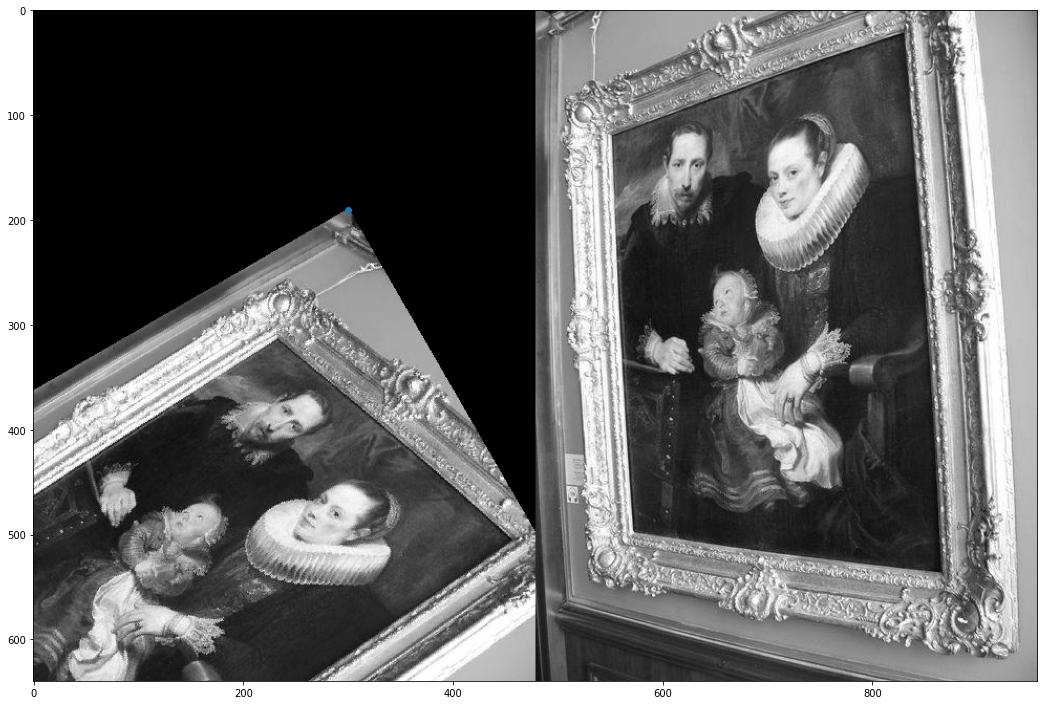

In [ ]:
(N,M) = X.shape

tx = 300
ty = 190

th = 60.0 / 180.0 * np.pi
R  = rotation_matrix_2d(th)
t  = np.array([tx, ty]).reshape(2, 1)
H  = np.hstack([R, t])
H  = np.vstack([H, np.array([0, 0, 1])])
Y = homography(X,H)
Z = np.concatenate((Y,X),axis=1)
print('tx = ',tx,'|   ty = ',ty,'|   th = ',th/np.pi*180,)
print('Imagen izquierda: Transformada                                 | Imagen derecha: Original')
plt.figure(figsize=(18,24))
plt.imshow(Z,cmap='gray')
plt.scatter(tx,ty)
plt.show()


# Estimation of Homography

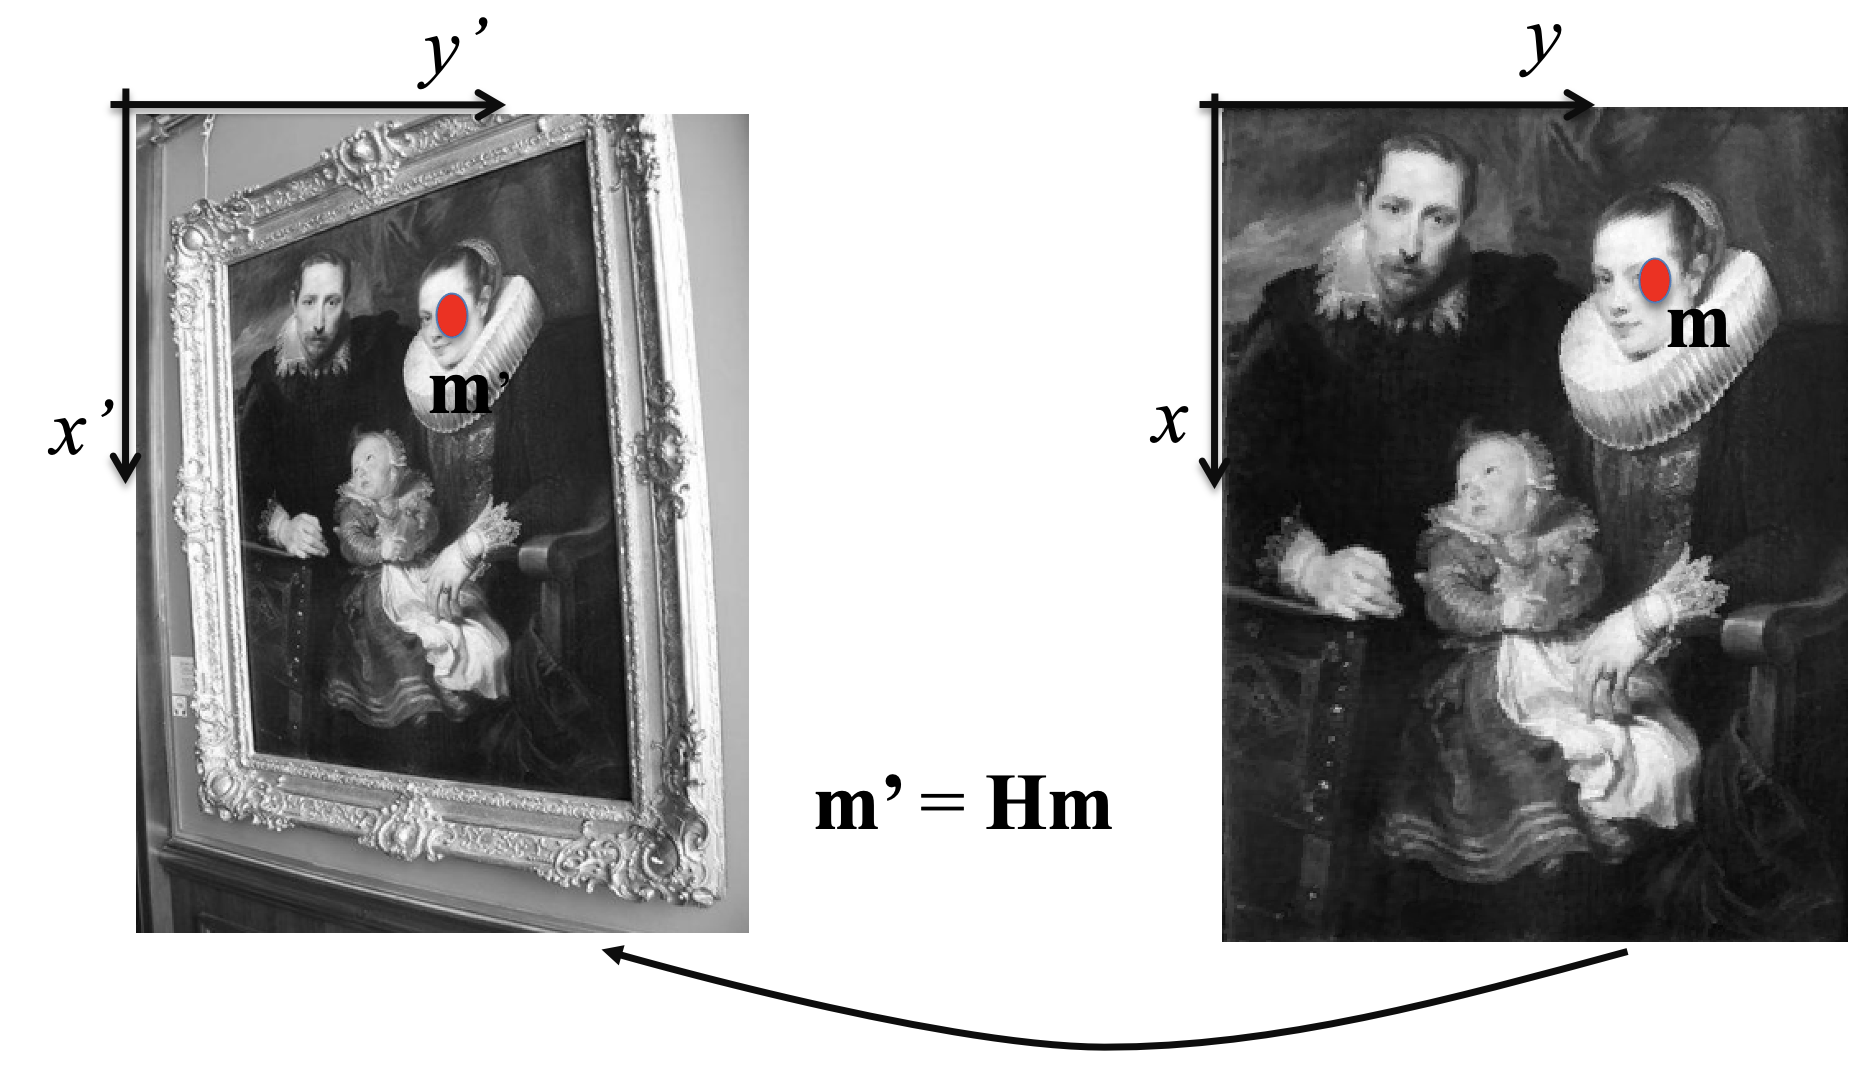

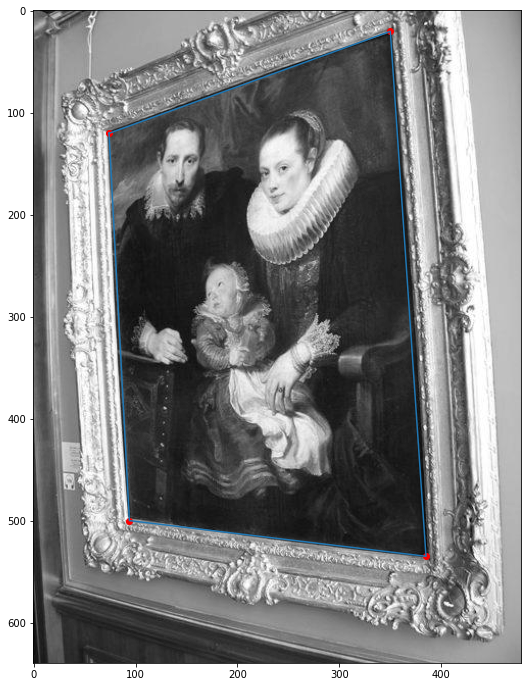

In [ ]:
# Corner coordinates of original images (mp = m')
xp = np.array([74,350,94,385])
yp = np.array([120,20,500,535])
i = np.array([0,1,3,2,0])
plt.figure(figsize=(18,12))
plt.imshow(X,cmap='gray')
plt.plot(xp[i],yp[i])
plt.scatter(xp,yp,c='red')
plt.show()

In [ ]:
# Corner coordinates of transformed images (m)
x = np.array([20,460,20,460])
y = np.array([20,20,620,620])

In [ ]:
# Estimation of H: mp = H*m

def homography_matrix(m,mp):
  (x ,y ) = m
  (xp,yp) = mp
  n       = len(x)
  A       = np.zeros((2*n,9))
  for i in range(n):
    j = i*2
    A[j  ,:] = [x[i], y[i], 1,     0,     0, 0, -x[i]*xp[i], -y[i]*xp[i], -xp[i]]
    A[j+1,:] = [  0  ,   0  , 0, x[i], y[i], 1, -x[i]*yp[i], -y[i]*yp[i], -yp[i]]
  [U,S,V] = np.linalg.svd(A)
  h       = V[-1,:]
  H       = np.vstack([h[0:3], h[3:6], h[6:9]])
  return H

In [ ]:
print('mp  = ', (xp,yp))
print('m   = ', (x,y))

mm = np.vstack([x, y, np.array([1, 1, 1, 1])])
H2 = homography_matrix((x,y),(xp,yp))
mmp = np.dot(H2,mm)
mmp = mmp/mmp[-1,:]

print('Estimacion de mp a partir de m:')
print('mps = ', (mmp[0,:],mmp[1,:]))


mp  =  (array([ 74, 350,  94, 385]), array([120,  20, 500, 535]))
m   =  (array([ 20, 460,  20, 460]), array([ 20,  20, 620, 620]))
Estimacion de mp a partir de m:
mps =  (array([ 74., 350.,  94., 385.]), array([120.,  20., 500., 535.]))


Imagen izquierda: Transformada                       | Imagen derecha: Original


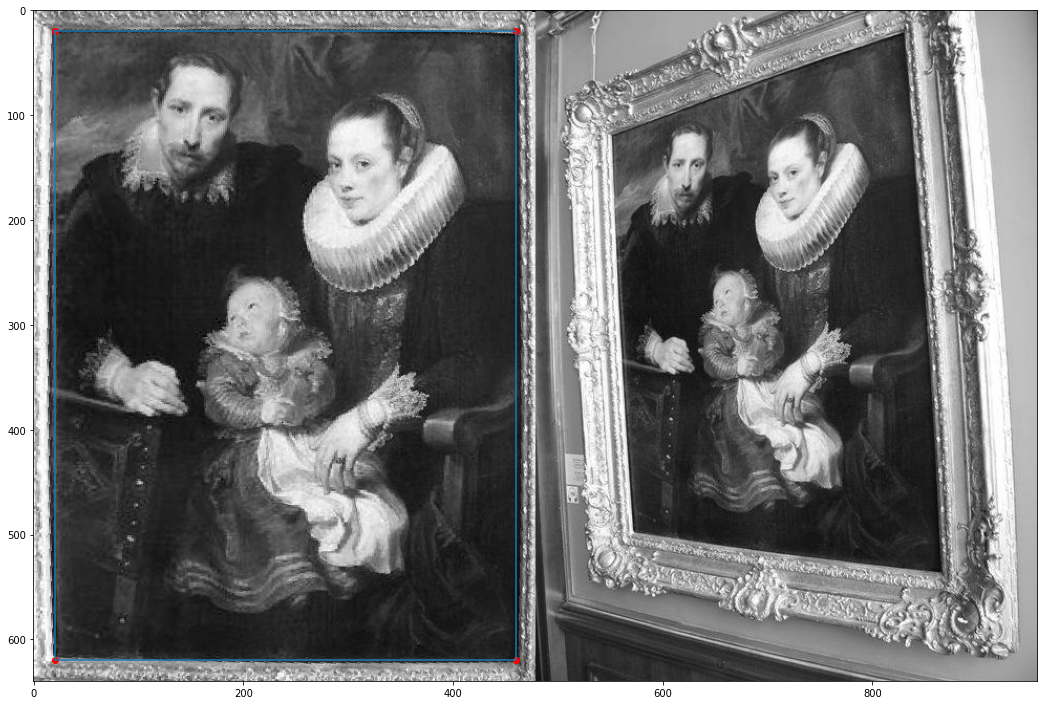

In [ ]:
Hinv  = np.linalg.inv(H2)

Y = homography(X,Hinv)
Z = np.concatenate((Y,X),axis=1)

print('Imagen izquierda: Transformada                       | Imagen derecha: Original')
plt.figure(figsize=(18,24))
plt.imshow(Z,cmap='gray')
plt.plot(x[i],y[i])
plt.scatter(x,y,c='red')
plt.show()
